In [265]:
'''
Machine Learning Break Down:
1. Get data into a numerical representation
2. Build a model to learn pattern in that numerical representation

Tensors Represent Inputs 
Neural Networks Represent those patterns/features/weights
'''


import torch
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

start = 0
end = 1
step = .02
bias =  0.3
weight = 0.7
X = torch.arange(start,end, step).unsqueeze(dim =1)

y= weight * X + bias


train_split = int(.8 * len(X))


X_train, y_train = X[:train_split], y[:train_split]

X_test, y_test = X[train_split:], y[train_split:]



print(len(X_train), len(X_test) , len(y_train), len(y_test))




40 10 40 10


hello world
Shape of train_data: torch.Size([40, 1])
Shape of x_data: torch.Size([40, 1])
Shape of train_label: torch.Size([40, 1])
Shape of test_data: torch.Size([10, 1])
Shape of test_label: torch.Size([10, 1])
Legend


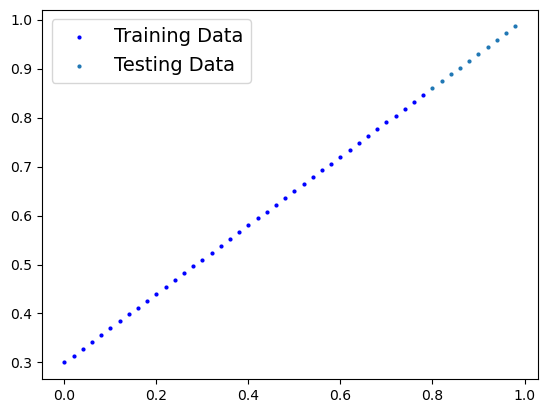

None


In [266]:
def plot_predictions(train_data = X_train, train_label = y_train, test_data = X_test, test_label = y_test, predictions = None ):
    print("hello world")

    print("Shape of train_data:", train_data.shape)
    print("Shape of x_data:", X_train.shape)
    print("Shape of train_label:", train_label.shape)
    print("Shape of test_data:", test_data.shape)
    print("Shape of test_label:", test_label.shape)
    #plotting training data
    print(plt.scatter(train_data, train_label, c = "b", s =4, label = "Training Data" ))

    #plotting testing data
    print(plt.scatter(test_data, test_label, s =4, label = "Testing Data" ))

    if predictions is not None:
        print(plt.scatter(test_data, predictions, c= "r", s=4, label = "Predictions"))


    #show the legend
    print(plt.legend(prop={"size": 14}))

    print(plt.show())

plot_predictions(X_train, y_train, X_test, y_test, None)

In [267]:
# creating linear regression class
from torch import nn
class LinearRegressionModel(nn.Module): # this is python inhertance example as LinearRegressionModel is inheriting from nn.Module
    def __init__(self): # python constructor syntax and super
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(
                                                1, 
                                                requires_grad= True,
                                                dtype= torch.float  
                                                ))
        self.bias = nn.Parameter(torch.randn(
                                                1,
                                                requires_grad= True, # default is true and this is for gradient descent
                                                dtype= torch.float # this is default and float defaults to float32
                                                ))
    # forward method for computation
        
    def forward(self, x: torch.Tensor) -> torch.Tensor: # when implementing nn.module a forward method is nescesary 
        return self.weights * x + self.bias # this is the linear regression formula

What the model above is doing: <br>
    *  Start with random values for the wieght + bias  <br>
    *  Look at the training data and adjust  the values so that they are a closer and better representation of the weights + bias used to create traning data 
    

How is this done? <br>
   &emsp; Two Main Algorithms: <br>
     &emsp; &emsp;    1.  Gradient Descent <br>
     &emsp; &emsp;    2. Back Propagation




Pytorch Essentials

&emsp; *   torch.nn - contains all the buildings for computational graphs (like neural networks) <br>
&emsp; *   torch.nn.Parameter - what paramters the model shoudl try and learn, most times a pytorch layer from torch.nn will automatically set this <br>
&emsp; *   torch.nm.Module - base case for all neural networks modules but if you create a subclass that inherits you need to overwrite forward() <br>
&emsp; *   torch.optim - this is for fine tuning gradient descent for a particular algorithm in order to efficiently find the min <br>
&emsp; *   torch.utils.data.Dataset - represents a map with label feature pariing for key and value of the data <br>
&emsp; *   torch.utls.data.Dataloader - creates an interator to go through dataset 

In [268]:
torch.manual_seed(42)

lrModel_0 = LinearRegressionModel()

print(lrModel_0)

LinearRegressionModel()


### Making Predictions using `torch.inference mode()`

To see model's predictive capabilities we see how well it predicts y_test based on a given x_test
To pass this data through our model we use the `forward()` method

In [269]:
# using inference mode will make predictions faster because you with torch.inference_mode() your not keeping track of the gradient function used
with torch.inference_mode():
    y_preds = lrModel_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

hello world
Shape of train_data: torch.Size([40, 1])
Shape of x_data: torch.Size([40, 1])
Shape of train_label: torch.Size([40, 1])
Shape of test_data: torch.Size([10, 1])
Shape of test_label: torch.Size([10, 1])
Legend


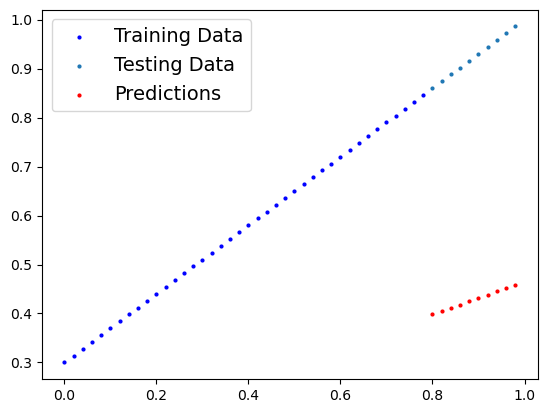

None


In [270]:
plot_predictions(predictions=y_preds)

### Training the Model 

*  The whole purpose of training the model is to start with random values to represent data and then adjust those values so that the outputs are more accurate 

*   Basically you start out with a poor representation of the data and then you want to adjust it so that the representation is better

*  To measure how poorly your model is performing you use a loss function

*  Note: Loss function may be called cost function or criterion

* Things we need to train: <br>

    *  **Loss Function:** A function to measure how wrong the model's predictions are to the expected output <br>
    
    *  **Optimizer:** To take the output of the loss function and update the model (like weight + bias, etc) accordingly

* And specifically for pytorch:
    * We need a Training Loop 
    * And a Testing Loop

In [271]:
# check out our models parameters ( the model sets its paramters by itself ):

lrModel_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [272]:
# setup a loss funciton

loss_fn = nn.L1Loss()

# setup an optimizer (stochastic gradient descent)

optimizer = torch.optim.SGD(params= lrModel_0.parameters(), 
                            lr = 0.01) # lr is the learning rate for the 'step' that the model takes during each training    

### Building a Training and Testing loop in Pytorch


0. Loop through the data
1. Forward pass (move the data through the forward method(s) - also called forward propagation - to make predictions on data)
2. Calculate the loss (compare the forward pass with the ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through network to calculate gradient with parameters with respect to the loss (**back propagation**)
5. Optimizer step - use the optimizer to adjust model paramters to improve the loss (**gradient descent**)


In [273]:
# an epoch is one loop through the data (its a hyperparamter because we set them)
epochs = 1000

# Track Different Values

epoch_count = []
loss_values = []
test_loss_values = []


# 0. loop through the data

for epoch in range(epochs):
    # set the model to training mode
    lrModel_0.train() # sets all parameters that requires gradients to require gradient

  

    # 1. forward pass
    y_preds = lrModel_0(X_train)

    # 2. calculate the loss
    loss = loss_fn(y_preds, y_train)
    print(f"Loss: {loss}")
    
   
    # 3. Optimizer Zero Grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the function
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step()

     # Testing
    lrModel_0.eval() # turns off different things not needed for model evaluation
    with torch.inference_mode():  # turns off gradient tracking and a couple more things behind the scenes (with torch.no_grad() is an older method for the same things)

        test_pred = lrModel_0(X_test)

        #calculate the loss
        test_loss = loss_fn(test_pred, y_test)
        if epoch % 10 == 0:
         epoch_count.append(epoch)
         loss_values.append(loss)
         test_loss_values.append(test_loss)
         print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
         # Print out the parameteres (tensors) with their values
         print(lrModel_0.state_dict())
   

Loss: 0.31288138031959534
Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: 0.3013603389263153
Loss: 0.28983935713768005
Loss: 0.2783183455467224
Loss: 0.26679736375808716
Loss: 0.2552763521671295
Loss: 0.24375534057617188
Loss: 0.23223432898521423
Loss: 0.22071333229541779
Loss: 0.20919232070446014
Loss: 0.1976713240146637
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Loss: 0.18615034222602844
Loss: 0.1746293306350708
Loss: 0.16310831904411316
Loss: 0.1515873372554779
Loss: 0.14006634056568146
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912236571312
Loss: 0.09681282937526703
Loss: 0.08908725529909134
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Loss: 0.08227583020925522
Loss: 0

OrderedDict([('weights', tensor([0.6654])), ('bias', tensor([0.3143]))])
Loss: 0.0069415816105902195
Loss: 0.006594527512788773
Loss: 0.006256377790123224
Loss: 0.005907378159463406
Loss: 0.005569314118474722
Loss: 0.005222179926931858
Loss: 0.004880307707935572
Loss: 0.004536977503448725
Loss: 0.00419129803776741
Loss: 0.003851778106763959
Epoch: 160 | Loss: 0.003851778106763959 | Test Loss: 0.008201557211577892
OrderedDict([('weights', tensor([0.6826])), ('bias', tensor([0.3073]))])
Loss: 0.0035027742851525545
Loss: 0.0031660839449614286
Loss: 0.0028175704646855593
Loss: 0.002477074507623911
Loss: 0.0021323724649846554
Loss: 0.0017880633240565658
Loss: 0.0014518297975882888
Loss: 0.0011887758737429976
Loss: 0.0025885060895234346
Loss: 0.00893248151987791
Epoch: 170 | Loss: 0.00893248151987791 | Test Loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Loss: 0.0025885060895234346
Loss: 0.00893248151987791
Loss: 0.0025885060895234346
Loss:

In [274]:
lrModel_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

hello world
Shape of train_data: torch.Size([40, 1])
Shape of x_data: torch.Size([40, 1])
Shape of train_label: torch.Size([40, 1])
Shape of test_data: torch.Size([10, 1])
Shape of test_label: torch.Size([10, 1])
Legend


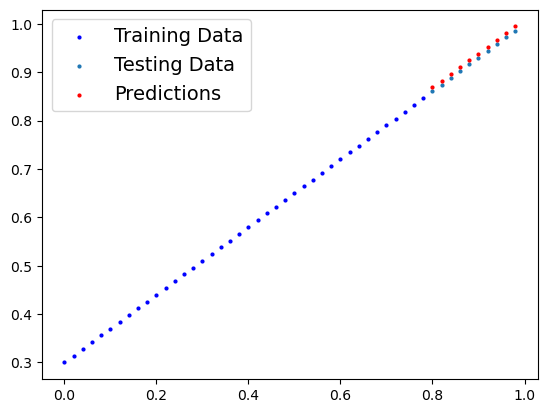

None


In [275]:

with torch.inference_mode():
    y_preds_new = lrModel_0(X_test)

    plot_predictions(predictions=y_preds_new)

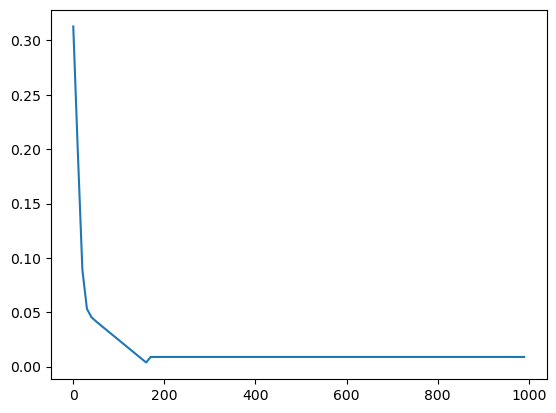

In [276]:

with torch.inference_mode():
    plt.plot(epoch_count, loss_values, label = "Train Loss")

### Saving a Model in Pytorch

* Three main methods to saving and loading models

1. `torch.save()` - saves pytorch model in python's pickel format
2. `toech.load` - loads a saved pytorch object
3. `torch.nn.Modual.load_saved_dict()` - allows you to load the saved models saved state dictionary (aka the important parameters)

https://pytorch.org/tutorials/beginner/saving_loading_models.html


In [277]:
# Saving torch model 

from pathlib import Path

# 1. Create the Models Directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create a Model Save Path   
MODEL_NAME = "first_model.pth" # common convention is to save files using pth or pt
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the Model's state dict

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj= lrModel_0.state_dict(), 
           f = MODEL_SAVE_PATH) # if your confused about the parameters literally search up the method and pytorch tells you what its looking for!

Saving model to: models/first_model.pth


In [278]:
# To load the saved model we have to first instantiate a new instance of our model
loaded_lrModel_0 = LinearRegressionModel()

# Load the saved dict of model_0 to update the parameters of our loaded_lrModel_0

loaded_lrModel_0.load_state_dict(torch.load(f= MODEL_SAVE_PATH))

/var/folders/34/8lq_66rx1bdchmr52gb_th440000gn/T/ipykernel_1039/1761375644.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_lrModel_0.load_state_dict(torch.load(f=

<All keys matched successfully>

In [279]:
# Make some predictions with the model

loaded_lrModel_0.eval()

with torch.inference_mode():
    loaded_lrModel_preds= loaded_lrModel_0(X_test)

loaded_lrModel_preds


tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

## Putting it all together 

In [280]:
import torch


# create sample data

X1 = torch.arange(0,50,1).unsqueeze_(dim= 1) # creates a the test to go from 0-50 inclusive 

weight = .7
bias = .3
Y1 = X1*weight + bias # creating the expected outputs for out y data 

# seperating our training and testing data
x1_train, y1_train = X1[:40] , Y1[:40]
x1_test , y1_test = X1[40:], Y1[40:]

#Creating model 


from torch import nn # imports the nn superclass

class LinearRegressionRemake(nn.Module):  # remember the parenthesis means that the model is inheriting from the nn.module superclass

    def __init__(self): #creating the constructor for the class
        super().__init__() #calling all the data from the superclass (python inheritance)
        self.weights = nn.Parameter(torch.randn(
                1, 
                dtype= torch.float32,
                requires_grad = True # automatically set to true
        ))
        self.bias = nn.Parameter(torch.randn(
            1,
            dtype= torch.float32, #automatically set to float 32 as well for tensors
            requires_grad= True
        ))

    def forward(self, x:torch.Tensor) -> torch.Tensor: # needs to return an ouptut of some sort of tensor 
        # think about the forward method as how our model is moving and actually getting better at performing
        return self.weights * x + self.bias




In [281]:
x1_train

tensor([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12],
        [13],
        [14],
        [15],
        [16],
        [17],
        [18],
        [19],
        [20],
        [21],
        [22],
        [23],
        [24],
        [25],
        [26],
        [27],
        [28],
        [29],
        [30],
        [31],
        [32],
        [33],
        [34],
        [35],
        [36],
        [37],
        [38],
        [39]])

In [282]:
# Training the Model

epochs = 100

lrRemake = LinearRegressionRemake()


loss_fn1 = nn.L1Loss()

optimzer1 = torch.optim.SGD( params= lrRemake.parameters(), lr = 0.01) # setting up training of model using stochastc gradient descent
 
for epoch in range(epochs):

    lrRemake.train()

    y1_preds = lrRemake(x1_train) # forward pass

    loss = loss_fn1(y1_preds, y1_train)
    print(f"Loss: {loss}")

    optimzer1.zero_grad() # resets the gradient for forward pass

    loss.backward() # performing back propagtion

    optimzer1.step()

    lrRemake.eval()

    with torch.inference_mode():  # turns off gradient tracking and a couple more things behind the scenes (with torch.no_grad() is an older method for the same things)

        test_pred = lrModel_0(X_test)

        #calculate the loss
        test_loss = loss_fn(test_pred, y_test)
        if epoch % 10 == 0:
         epoch_count.append(epoch)
         loss_values.append(loss)
         test_loss_values.append(test_loss)
         print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
         # Print out the parameteres (tensors) with their values
         print(lrModel_0.state_dict())
    





Loss: 36.03202438354492
Epoch: 0 | Loss: 36.03202438354492 | Test Loss: 0.008447891101241112
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
Loss: 32.219520568847656
Loss: 28.407028198242188
Loss: 24.59453010559082
Loss: 20.782028198242188
Loss: 16.969528198242188
Loss: 13.15703010559082
Loss: 9.344529151916504
Loss: 5.5320281982421875
Loss: 1.7195287942886353
Loss: 2.132093906402588
Epoch: 10 | Loss: 2.132093906402588 | Test Loss: 0.008447891101241112
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
Loss: 1.6590290069580078
Loss: 2.191598415374756
Loss: 1.6282790899276733
Loss: 2.221898317337036
Loss: 1.5975286960601807
Loss: 2.2521989345550537
Loss: 1.5667787790298462
Loss: 2.282499074935913
Loss: 1.5360281467437744
Loss: 2.3127989768981934
Epoch: 20 | Loss: 2.3127989768981934 | Test Loss: 0.008447891101241112
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
Loss: 1.50527822971344
Loss: 2.343099594116211
Loss: 1